## Business Understanding
The stakeholder for this project is Syriatel where we shall work with and report to the Customer Retention Manager.

The issue here is that the manager finds that there in increased customer churn i.e. customers leaving the company and wishes to be able to identify, in advance, customers who are likely to leave.

## Data understanding

#### Load the Required Libraries

In [ ]:
# Load Libraries to be used in the project

import pandas as pd     #load and manipulate data
import numpy as np      # mathematical operations
import matplotlib.pyplot as plt     #visualisation
import sklearn          #machine learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Load the dataset 

df = pd.read_csv("data\syriatel_churn.csv")

df.head() # view the first five entries

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Conduct further exploration to understand the dataset

In [21]:
df.shape    # Checks no. of rows and columns
df.info()   # Shows column names, non-null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The data set has 21 columns with 3333 entries each which are all non-null. No obvious missing entries.

We'll then understand the churn column better as it will be an area of focus.

In [22]:
df['churn'].value_counts(normalize=True)    #checks how many customers churned as %

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

The above indicates that, from provided historical data, approximately 14.5% of customers are churning and 85% are not. The data set is not balanced as there is much more representation of non- churn customers (85%) than those who did churn (14.5%).

This means that the data is imbalanced since one class is much more strongly represented than the other. This will be crucial to keep in mind when conducting evaluation of the models and their predictions.



## Data preperation 

In [55]:
df.columns      # View columns in the data set before declaring y and X

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

#### Identify Target variable(y) and feature variables(X)

In [ ]:
y = df["churn"]     # Target variable to be predicted

X = df.drop(columns=["churn", "phone number", "total day charge", "total eve charge", "total night charge", "total intl charge"]) #Drop columns in df including churn and unimportant columns

X.columns   #Check that dropped columns have been dropped

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls'],
      dtype='object')

#### Split the declared variables 
 Split y and X into training sets and test sets respectively.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #Stratify ensures that churn and non-churn customers are proportionally included

In [26]:
print(y_train.value_counts(normalize=True)) #check churn proportions in train set

churn
False    0.855214
True     0.144786
Name: proportion, dtype: float64


In [27]:
print(y_test.value_counts(normalize=True)) #check churn proportions in test set

churn
False    0.854573
True     0.145427
Name: proportion, dtype: float64


In [28]:
X_train.dtypes  #Identify data types in X_train set

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total eve minutes         float64
total eve calls             int64
total night minutes       float64
total night calls           int64
total intl minutes        float64
total intl calls            int64
customer service calls      int64
dtype: object

In [29]:
cat_cols = X_train.select_dtypes(include=['object']).columns # Select Categorical columns i.e. object

cat_cols

Index(['state', 'international plan', 'voice mail plan'], dtype='object')

In [30]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns #Select numerical columns

num_cols

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total intl minutes', 'total intl calls', 'customer service calls'],
      dtype='object')

#### Encode Categorical Columns (OHE)

In [31]:
X_train_encoded = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)

X_test_encoded = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)

In [32]:
# Align Train set and test set columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [33]:
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(2666, 64)
(667, 64)


#### Scale features to similar scale for Logistic Regression

In [34]:
scaler = StandardScaler()   # Initialise scaler


X_train_scaled = scaler.fit_transform(X_train_encoded)  # Fit scaler on training data


X_test_scaled = scaler.transform(X_test_encoded)    #Transform test data to same scale

## Modelling

### 1a. Base Logistic Regression

In [35]:
#Initialise model

lr = LogisticRegression(random_state=42)

# Train the model
lr.fit(X_train_scaled, y_train)

# Predict

y_train_pred = lr.predict(X_train_scaled)

y_test_pred = lr.predict(X_test_scaled)

#### Evaluate Performance of the Base logistic regression model

In [36]:
confusion_matrix(y_test, y_test_pred)

array([[550,  20],
       [ 71,  26]])

In [37]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       False       0.89      0.96      0.92       570
        True       0.57      0.27      0.36        97

    accuracy                           0.86       667
   macro avg       0.73      0.62      0.64       667
weighted avg       0.84      0.86      0.84       667



In [38]:
recall_score(y_test, y_test_pred)

0.26804123711340205

From the above evaluation, we find that the model achieves 86% accuracy on testing. However, this doesn't give a true picture as we already know that the dataset supplied was heavy on non- churn customers.

Also, the model correcty identifies only 26% of customers who shall churn. This is too low for the intended purpose of our analysis, objectives and business needs.

We will therefore need to tune our model further.

We will do this by telling the model to give more weight to the dataset customers who churn.

In [39]:
class_weight = 'balanced'   #Gives more 'weight' to churn customers i.e. minority class

### 1b. Tuned Logistic Regression

In [40]:
#Initialise tuned logistic regression
tuned_lr = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

In [41]:
#Fit the model

tuned_lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [42]:
#Predict

y_test_pred_tuned = tuned_lr.predict(X_test_scaled)

#### Evaluate tuned Logistic Regression Model

In [43]:
# Evaluate tuned model

print(classification_report(y_test, y_test_pred_tuned))

confusion_matrix(y_test, y_test_pred_tuned)

recall_score(y_test, y_test_pred_tuned)

              precision    recall  f1-score   support

       False       0.94      0.75      0.84       570
        True       0.33      0.70      0.45        97

    accuracy                           0.75       667
   macro avg       0.63      0.73      0.64       667
weighted avg       0.85      0.75      0.78       667



0.7010309278350515

The tuned model is now able to predict 70% of churn customers compared to the initial 27%.

Unfortunately, precision has dropped in the process since it incorrectly selects more non churn customers as churn customers.

This might result in the business reaching out or developing promotions for more churn customers who would in reality not be churn customers meaning the business will incur more cost while protecting revenue.

### 2. Decision Tree

#### Build Decision Tree

In [46]:
dec_tree = DecisionTreeClassifier(random_state=42)

#Fit the model

dec_tree.fit(X_train_encoded, y_train)

#Predict
y_test_pred_tree = dec_tree.predict(X_test_encoded)

In [ ]:
# Evaluate test data
print(classification_report(y_test, y_test_pred_tree))

confusion_matrix(y_test, y_test_pred_tree)

              precision    recall  f1-score   support

       False       0.94      0.94      0.94       570
        True       0.64      0.65      0.65        97

    accuracy                           0.90       667
   macro avg       0.79      0.79      0.79       667
weighted avg       0.90      0.90      0.90       667



array([[535,  35],
       [ 34,  63]])

From the above evaluation, we find that the decision tree detects 65% of customers that churn, has higher accuracy and precision compared to logistic regression.

However, we still need to check for the likelihood of overfitting by also evaluating the training model.

#### Evaluate decision tree training model

In [ ]:
# Evaluate training model for overfitting

y_train_pred_tree = dec_tree.predict(X_train_encoded)

print(classification_report(y_train, y_train_pred_tree))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2280
        True       1.00      1.00      1.00       386

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666



From the above evaluation, we can determine that the training model is overfitting therefore not able to correctly generalise.

We then need to also tune the decision tree to improve generalisation and robustness of the model.

In [69]:
# Tune Decision tree

dec_tree_tune = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

#Create model
dec_tree_tune.fit(X_train_encoded, y_train)

#Predict
y_test_pred_tuned_tree = dec_tree_tune.predict(X_test_encoded)

y_train_pred_tuned_tree = dec_tree_tune.predict(X_train_encoded)


In [70]:
# Evaluate tuned decision tree

#print("Training Performance:")
#print(classification_report(y_train, y_train_pred_tuned_tree))

print("Test Performance:")
print(classification_report(y_test, y_test_pred_tuned))


Test Performance:
              precision    recall  f1-score   support

       False       0.94      0.75      0.84       570
        True       0.33      0.70      0.45        97

    accuracy                           0.75       667
   macro avg       0.63      0.73      0.64       667
weighted avg       0.85      0.75      0.78       667



In [73]:
# Create model comparison dictionary
model_results = {
    "Baseline Logistic": {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Recall (Churn)": recall_score(y_test, y_test_pred),
        "Precision (Churn)": precision_score(y_test, y_test_pred)
    },
    "Tuned Logistic": {
        "Accuracy": accuracy_score(y_test, y_test_pred_tuned),
        "Recall (Churn)": recall_score(y_test, y_test_pred_tuned),
        "Precision (Churn)": precision_score(y_test, y_test_pred_tuned)
    },
    "Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_test_pred_tree),
        "Recall (Churn)": recall_score(y_test, y_test_pred_tree),
        "Precision (Churn)": precision_score(y_test, y_test_pred_tree)},
    "Tuned Decision Tree": {
        "Accuracy": accuracy_score(y_test, y_test_pred_tuned),
        "Recall (Churn)": recall_score(y_test, y_test_pred_tuned),
        "Precision (Churn)": precision_score(y_test, y_test_pred_tuned)
    
    }
}


In [74]:
# Convert dictionary to DataFrame
comparison_df = pd.DataFrame(model_results).T

# Round for clean presentation
comparison_df = comparison_df.round(2)

comparison_df


,Accuracy,Recall (Churn),Precision (Churn)
Baseline Logistic,0.86,0.27,0.57
Tuned Logistic,0.75,0.70,0.33
Decision Tree,0.90,0.65,0.64
Tuned Decision Tree,0.75,0.70,0.33


The tuned decision tree has an accuracy of 75%, precision of 33% and recall of 70%. This evaluation is much less impressive than the untuned tree which had an accuracy of 90%, precision of 64% and recall of 65%.

The untuned decision tree achieved 90% accuracy on the test set and has balanced performance on churn class, with 65% recall and 64% precision.

Although the model overfits the training data (100% training accuracy), its test performance remains strong and more balanced than base and balanced logistic regression models. Compared to the balanced logistic regression, the Decision Tree maintains high recall while substantially improving precision, reducing unnecessary interventions.

Given the business objective of identifying customers likely to churn while minimizing excessive false positives, the Decision Tree provides the most practical balance between recall and precision.


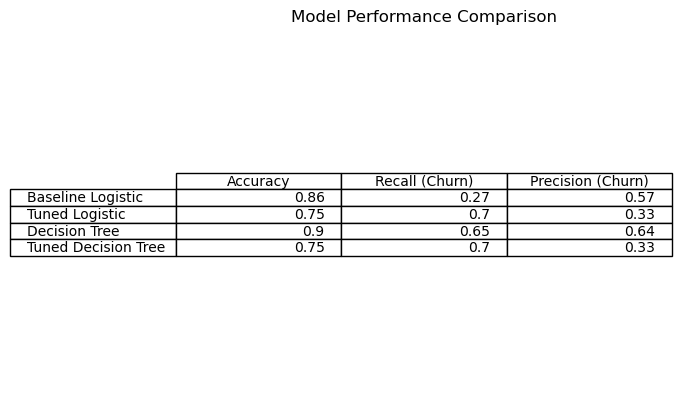

In [75]:
#Plot the table showing evaluation of Lr and decision tree

plt.figure()
plt.table(cellText=comparison_df.values,
          colLabels=comparison_df.columns,
          rowLabels=comparison_df.index,
          loc='center')

plt.axis('off')
plt.title("Model Performance Comparison")

plt.show()


## Drivers of churn

From the data and model, we can ascertain which features are most likely to cause a customer to move away from Syriatel.

In [77]:
# Extract feature importance from final decision tree
importances = dec_tree.feature_importances_

# Create DataFrame pairing features with importance values
feature_importance_df = pd.DataFrame({
    "Feature": X_train_encoded.columns,
    "Importance": importances
})

# Sort from highest to lowest importance
feature_importance_df = feature_importance_df.sort_values(
    by="Importance",
    ascending=False
)

feature_importance_df.head(10)


,Feature,Importance
3,total day minutes,0.251740
5,total eve minutes,0.122152
11,customer service calls,0.120304
9,total intl minutes,0.111163
2,number vmail messages,0.076554
62,international plan_yes,0.067665
10,total intl calls,0.061943
7,total night minutes,0.050178
4,total day calls,0.024328
6,total eve calls,0.019545


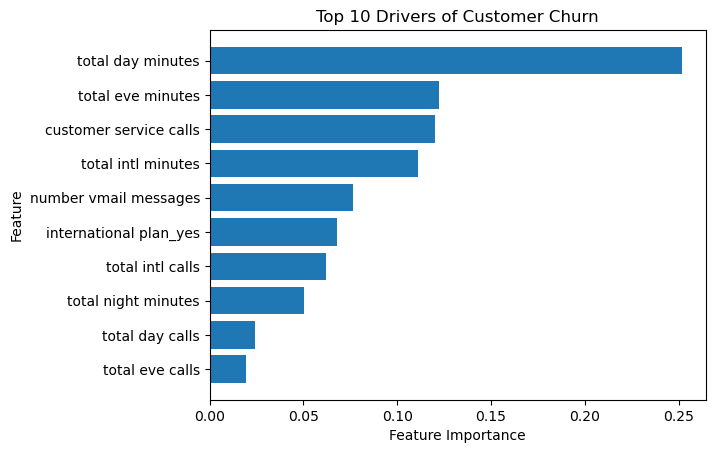

In [78]:


# Select top 10 features
top_features = feature_importance_df.head(10)

plt.figure()
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 10 Drivers of Customer Churn")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


## Conclusion

Overall, there seems to be an issue with the availability and quality of call service. Total day minutes was the more important feature that indicated likelihood of churn followed by total eve minutes.

Syriatel needs to check on service quality and call duration availability especially during the day as it is the key driver of churn. Incentives should be given for messaging or for calls in the evening.

Customer service calls and international minutes were also key.

## Limitations

The model is based on historical data and may not capture future behavioral changes.
- Some customers will be incorrectly flagged as high risk (false positives).
- The decision tree model shows signs of overfitting and may require further tuning.
- External factors not captured in the dataset may also strongly influence churn.
